Loaded (4012, 256, 256, 3) (4012, 256, 256, 3)


[2030]


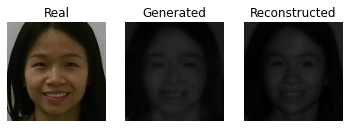

In [33]:
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
# from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
import tensorflow as tf
import tensorflow_addons as tfa
# from tfa.layers.InstanceNormalization import InstanceNormalization

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	print(ix)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
A_data, B_data = load_real_samples('test_final.npz')
print('Loaded', A_data.shape, B_data.shape)
# load the models
cust = {'InstanceNormalization': tfa.layers.InstanceNormalization}
model_AtoB = load_model('3_4_cycleGAN/g_model_AtoB_520380.h5', cust)
model_BtoA = load_model('3_4_cycleGAN/g_model_BtoA_520380.h5', cust)
# plot A->B->A
# A_real = select_sample(A_data, 1)
# B_generated  = model_AtoB.predict(A_real)
# A_reconstructed = model_BtoA.predict(B_generated)
# show_plot(A_real, B_generated, A_reconstructed)
# # plot B->A->B
# B_real = select_sample(B_data, 1)
# A_generated  = model_BtoA.predict(B_real)
# B_reconstructed = model_AtoB.predict(A_generated)
# show_plot(B_real, A_generated, B_reconstructed)

# ix = randint(0, A_data.shape[0], 1)
ix = [2030]
print(ix)
# retrieve selected images
X = A_data[ix]

A_real = X
B_generated  = model_AtoB.predict(A_real)
B_real = B_data[ix]
show_plot(A_real, B_generated, B_real)

Loaded (4012, 256, 256, 3) (4012, 256, 256, 3)


[3784]


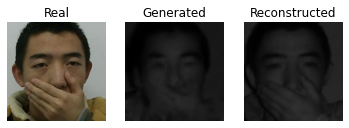

In [1]:
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
# from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
import tensorflow as tf
import tensorflow_addons as tfa
# from tfa.layers.InstanceNormalization import InstanceNormalization

def plot_images(src_img, gen_img, tar_img, idx):
	my_dpi=144
	pyplot.figure(figsize=(256/my_dpi, 256/my_dpi), dpi=my_dpi)
	for i in range(len(gen_img)):
		gen_img = (gen_img + 1) / 2.0
		# print(gen_img.shape)
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(gen_img[i])
		# pyplot.show()
	filename1 = '/home/gary/CV_lab_face_team/3_4_cycleGAN_MSE/{}g.png'.format(idx)
	pyplot.savefig(filename1, dpi=my_dpi)


	my_dpi=144
	pyplot.figure(figsize=(256/my_dpi, 256/my_dpi), dpi=my_dpi)
	for i in range(len(tar_img)):
		tar_img = (tar_img + 1) / 2.0
		# print(tar_img.shape)
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(tar_img[i])
		# pyplot.show()
	filename1 = '/home/gary/CV_lab_face_team/3_4_cycleGAN_MSE/{}t.png'.format(idx)
	pyplot.savefig(filename1, dpi=my_dpi)

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	print(ix)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
A_data, B_data = load_real_samples('test_final.npz')
print('Loaded', A_data.shape, B_data.shape)
# load the models
cust = {'InstanceNormalization': tfa.layers.InstanceNormalization}
model_AtoB = load_model('g_model_AtoB_520380.h5', cust)
# model_BtoA = load_model('g_model_BtoA_520380.h5', cust)
# plot A->B->A
# A_real = select_sample(A_data, 1)
# B_generated  = model_AtoB.predict(A_real)
# A_reconstructed = model_BtoA.predict(B_generated)
# show_plot(A_real, B_generated, A_reconstructed)
# # plot B->A->B
# B_real = select_sample(B_data, 1)
# A_generated  = model_BtoA.predict(B_real)
# B_reconstructed = model_AtoB.predict(A_generated)
# show_plot(B_real, A_generated, B_reconstructed)

ix = randint(0, A_data.shape[0], 1)
print(ix)
# retrieve selected images
X = A_data[ix]
A_real = X
B_generated  = model_AtoB.predict(A_real)
B_real = B_data[ix]
show_plot(A_real, B_generated, B_real)

# for i in range(len(A_data)):
# 	print(i)
# 	src_image, tar_image = A_data[[i]], B_data[[i]]
# 	gen_image = model_AtoB.predict(src_image)
#     # gen_image = g_model.predict(src_image)

# 	plot_images(src_image, gen_image, tar_image, i)

In [2]:
import numpy as np
import cv2

MSE = 0
for i in range(len(A_data)):
    img1 = cv2.imread('/home/gary/CV_lab_face_team/3_4_cycleGAN_MSE/{}t.png'.format(i))
    img2 = cv2.imread('/home/gary/CV_lab_face_team/3_4_cycleGAN_MSE/{}g.png'.format(i))
    mse = np.square(np.subtract(img1, img2)).mean()
    MSE = MSE + mse
MSE = MSE / len(A_data)
print("MSE: ", MSE)


MSE:  27.396675360880252
